# FINM 25000

### Review Notes 2 - Python Helper Guide

##### 6/24/2022

Note: if you haven't reviewed the last review session, I would recommend that you review that here: https://canvas.uchicago.edu/courses/42908/discussion_topics/535058. Some items discussed here are built on concepts discussed in the first session. 

## Quick Recap:

Last week we discussed the following items:

1. Portfolio Summary Statistics
    - Mean
    - Volatality
    - Sharpe Ratio 
2. Simple Portfolio Construction
    - Equally Weighted Portfolio
    - Risk Parity Portfolio    
3. Mean-Variance Optimization
    - Tangency Portfolio Weights and Allocation
    - Out-of-Sample Performance
    

For the review session this week, we will discuss the portfolio summary statistics in more detail and introduce a few tail risk measures that are most commonly used in the industy to characterize portfolio performance. A majority of the time this week will be spent understanding **Linear Regression** and its application to portfolio management!

#### Let's start by importing our usual set of data analysis modules in python. Note that this week we will introduce two new modules: ***statsmodels*** and ***scikit-learn*** which provide access to easy-to-use fuctions which allow us to built statistical models efficiently

In [1]:
# If you have never installed statsmodels before, uncomment and run the commands below
# !pip install statsmodels
# !pip install scikit-learn

In [2]:
# Import the packages we need

import pandas as pd
pd.options.display.float_format = '{:.3f}'.format
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression 

In [3]:
# Read the excel file for this homework

#Descriptions sheet. Note the use of .rename to correct column names that are not correctely named in the source file
desc = pd.read_excel('proshares_analysis_data.xlsx','descriptions').rename(columns={'Unnamed: 0':'Symbol'}).set_index('Symbol')

#Hedge Fund Data
hf = pd.read_excel('proshares_analysis_data.xlsx','hedge_fund_series').set_index('date')

#Merrill Lynch Factor Data
mf = pd.read_excel('proshares_analysis_data.xlsx','merrill_factors').set_index('date')

#Other Data
od = pd.read_excel('proshares_analysis_data.xlsx','other_data').set_index('date')

In [4]:
hf.head()

,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
date,,,,,
2011-08-31,-0.032,-0.026,-0.026,-0.027,-0.006
2011-09-30,-0.039,-0.032,-0.033,-0.032,-0.022
2011-10-31,0.027,0.044,0.043,0.051,0.025
2011-11-30,-0.013,-0.012,-0.012,-0.029,-0.008
2011-12-31,-0.004,0.002,0.002,0.013,0.002


In [5]:
mf.head()

,SPY US Equity,USGG3M Index,EEM US Equity,EFA US Equity,EUO US Equity,IWM US Equity
date,,,,,,
2011-08-31,-0.055,0.000,-0.093,-0.088,-0.006,-0.089
2011-09-30,-0.069,0.000,-0.179,-0.108,0.142,-0.112
2011-10-31,0.109,-0.000,0.163,0.096,-0.070,0.151
2011-11-30,-0.004,0.000,-0.020,-0.022,0.055,-0.004
2011-12-31,0.010,0.000,-0.043,-0.022,0.076,0.005


## Portfolio Return Statistics

### Return Moments

Last week, we calculated the mean and volatality of the return series. Let's formally define these:

<b> Return Mean: </b> It's the estimation of the first moment of returns

$$
\mu = \mathbb{E}[r_t]
$$

<b> Variance: </b> It's the estimation of the second moment of returns

$$
\sigma^2 = var[r_t] = \mathbb{E}[(r_t - \mu)^2]
$$


Last week, we also learned how to annualize these meterics. We can multiply by return mean and return variance by h where h is the number of observations in an year (12 for monthly data, 252 for daily data)  

Mean and Variance estimates are enough to characterize the return distribution if we assume that the returns are normally distributed. However, in practice normal distribution is rarely a good approximation for returns. Hence, to fully understand the distribution of portfolio returns we need higher moments that first and second moments

### Third Moment of Return: Skewness


Skewness is defined as the (scaled) third centralized moment of the distribution:

$$
\zeta = \frac{\mathbb{E}[(r_t - \mu)^3]}{\sigma^3}
$$

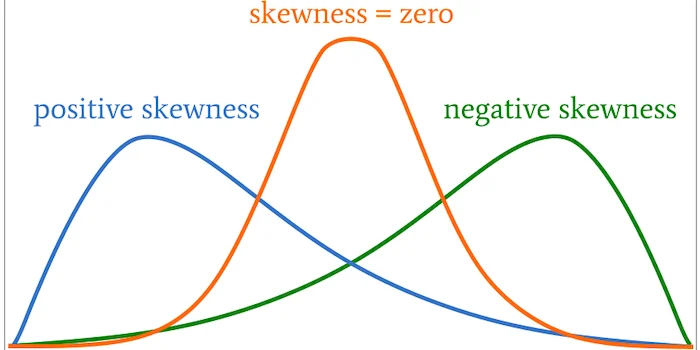

Skewness checks for a lopsided tail in the distribution, in a returns distribution, it allows us to check the presence of large negative or positive returns

In [6]:
#To calculate skewness, use:
hf.skew()

HFRIFWI Index    -1.109
MLEIFCTR Index   -0.187
MLEIFCTX Index   -0.172
HDG US Equity    -0.180
QAI US Equity    -0.545
dtype: float64

### Fourth Moment of Return: Kurtosis

Kurtosis is a measure of whether the data are heavy-tailed or light-tailed, and detects the presence of outliers on both tails

$$
\kappa = \frac{\mathbb{E}[(r_t - \mu)^4]}{\sigma^4}
$$

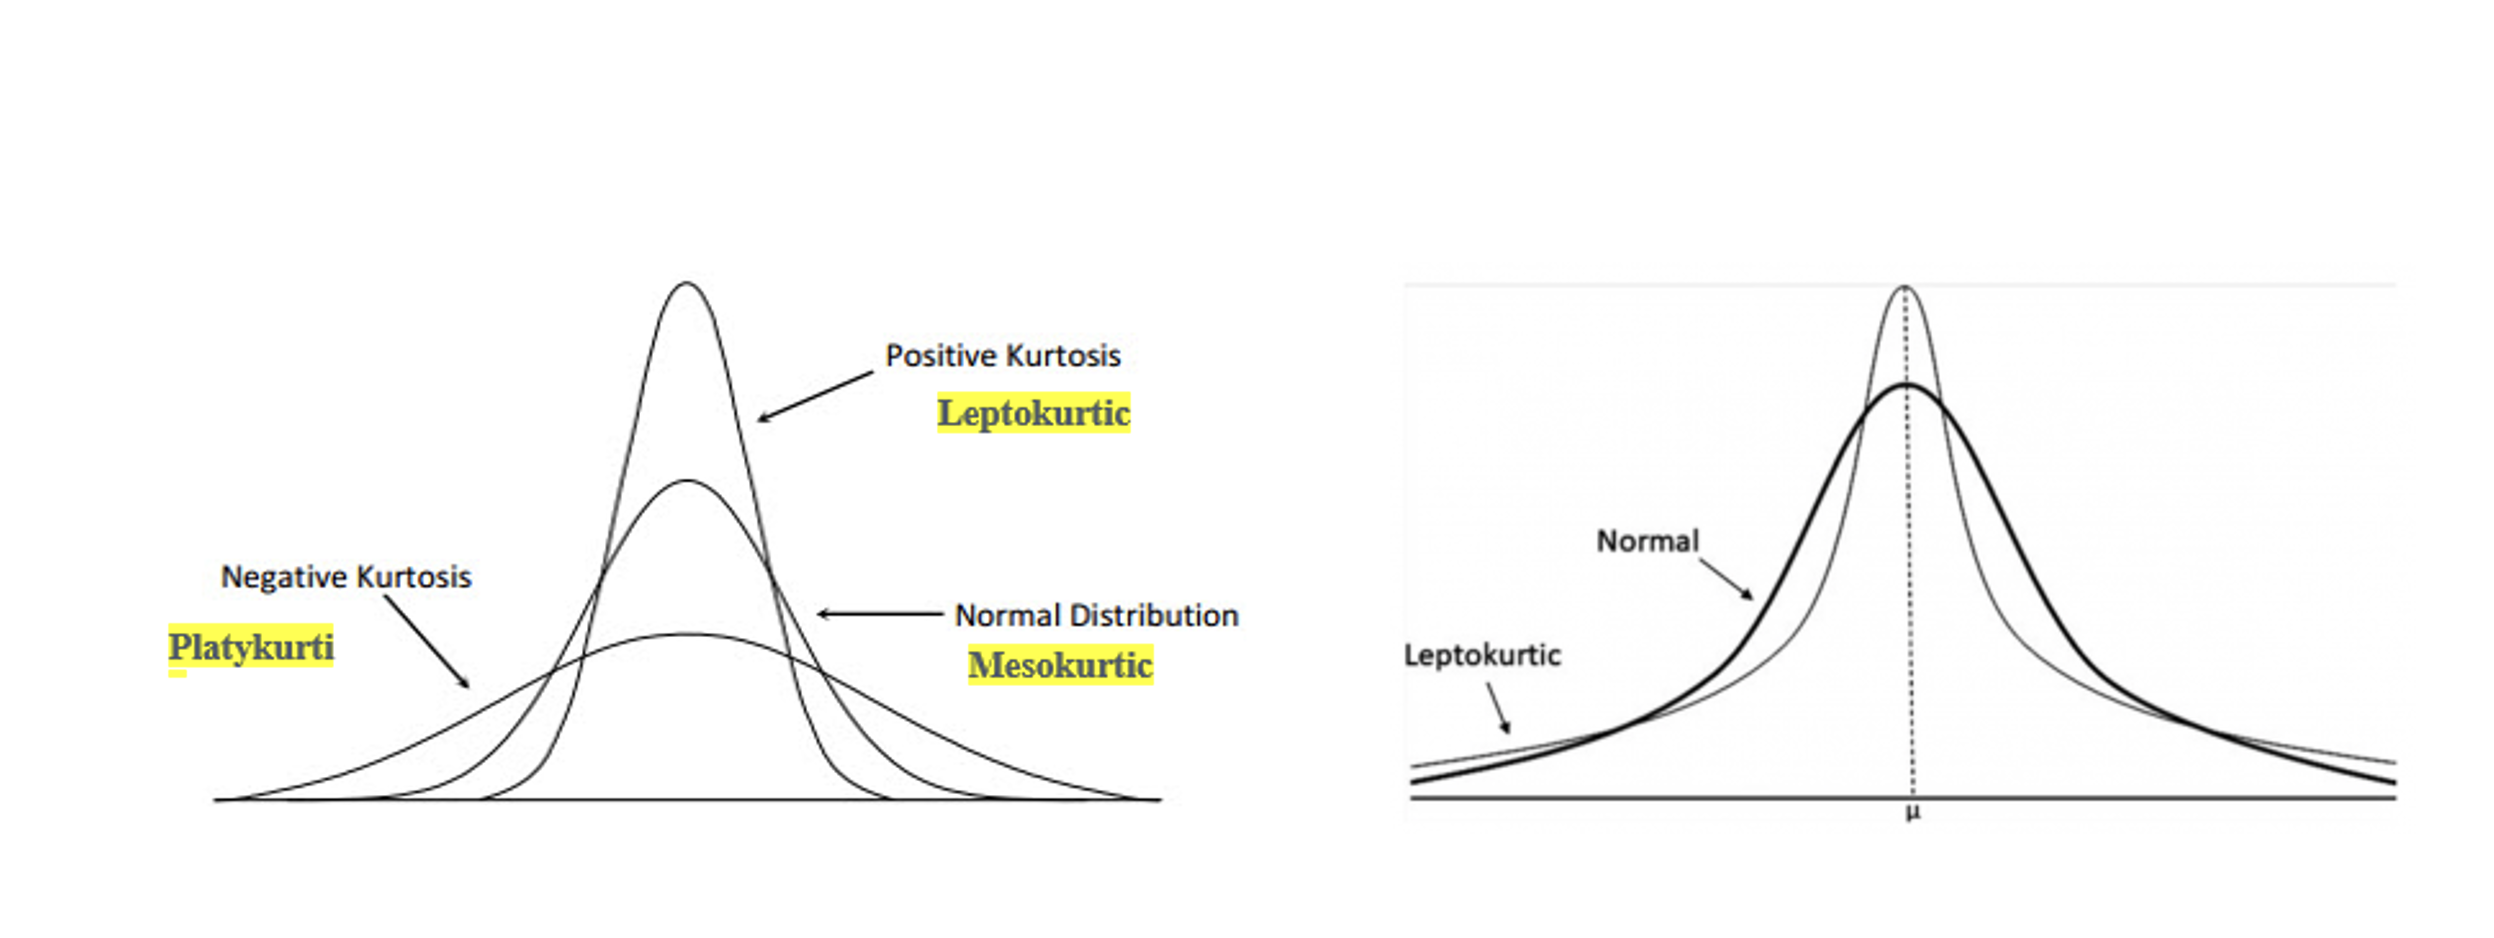


A normal distribution has a kurtosis of 3, hence it is common to define excess kurtosis as $\kappa - 3$ to identify departure of observed distribution from normal distribution. A positive excess kurtosis is called a leptokurtic and is evidence for fatter tails. A negative excess kurtosis is called a Platykurtic and zero excess kurtosis is called Mesokurtic 

In [7]:
#To calculate kurtosis, use:
hf.kurtosis() - 3

HFRIFWI Index     3.730
MLEIFCTR Index   -0.571
MLEIFCTX Index   -0.624
HDG US Equity    -0.418
QAI US Equity    -0.330
dtype: float64

### Value-at-Risk (VaR)

The $\tau$-day, $\pi$% Value at Risk (VaR) of a portfolio is defined as $VaR_{\pi, \tau}$ such that:
   - there is a $\pi$% chance
   - that over a horizon of $\tau$ days
   - the portfolio will lose an amount greater than VaR.
   
The VaR in terms of returns is simply the π quantile of the observed returns.

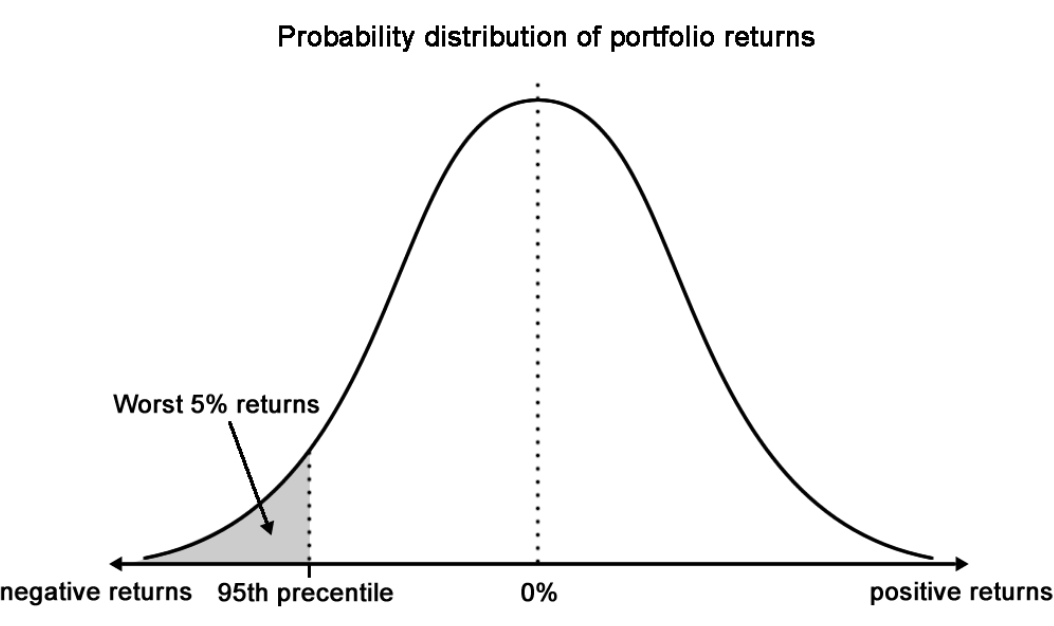

In [8]:
#To calculate 1 month 5% VaR:
hf.quantile(0.05)

HFRIFWI Index    -0.025
MLEIFCTR Index   -0.026
MLEIFCTX Index   -0.026
HDG US Equity    -0.029
QAI US Equity    -0.016
Name: 0.05, dtype: float64

### Expected Shortfall (Conditional VaR)

Expected Shortfall (ES) refers to the expected loss conditional on a loss greater than $VaR_{\pi, \tau}$ occurring.

- ES is the expected horizon-$\tau$ loss, conditional on a loss in the $(1 − \pi)$ % tail of the loss cdf occurring.
- That is, ES looks at expected loss given that a loss of at least $VaR_{\pi, \tau}$ has occurred.

Thus, ES is simply the mean of all returns smaller than the π quantile.

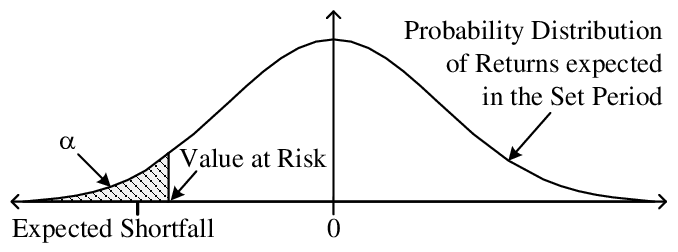

In [9]:
#For 1-month 5% CVaR:
(hf[hf < hf.quantile(0.05)]).mean()

HFRIFWI Index    -0.039
MLEIFCTR Index   -0.033
MLEIFCTX Index   -0.033
HDG US Equity    -0.035
QAI US Equity    -0.026
dtype: float64

### Maximum Drawdown

The maximum drawdown (MDD) of a return series is the maximum cumulative loss suffered during the time period.
- Visually, this is the largest peak-to-trough during the sample.
- This is a path-dependent statistic, and it is much less precise to estimate for the future.
- It is widely cited in performance evaluation to understand how badly the investment might perform.

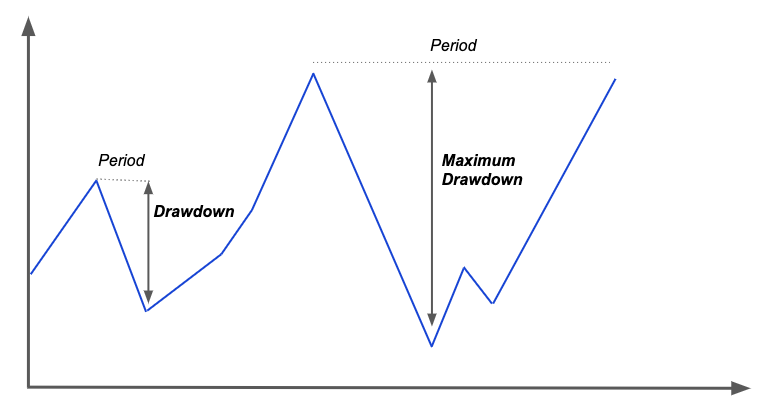

In [10]:
#Maximum Drawdown
def maximumDrawdown(returns):
    cum_returns = (1 + returns).cumprod()
    rolling_max = cum_returns.cummax()
    drawdown = (cum_returns - rolling_max) / rolling_max

    max_drawdown = drawdown.min()
    end_date = drawdown.idxmin()
    summary = pd.DataFrame({'Max Drawdown': max_drawdown, 'Bottom': end_date})

    for col in drawdown:
        summary.loc[col,'Peak'] = (rolling_max.loc[:end_date[col],col]).idxmax()
        recovery = (drawdown.loc[end_date[col]:,col])
        try:
            summary.loc[col,'Recover'] = pd.to_datetime(recovery[recovery >= 0].index[0])
        except:
            summary.loc[col,'Recover'] = pd.to_datetime(None)

        summary['Peak'] = pd.to_datetime(summary['Peak'])
        try:
            summary['Duration (to Recover)'] = (summary['Recover'] - summary['Peak'])
        except:
            summary['Duration (to Recover)'] = None
            
        summary = summary[['Max Drawdown','Peak','Bottom','Recover','Duration (to Recover)']]

    return summary  

In [11]:
maximumDrawdown(hf)

,Max Drawdown,Peak,Bottom,Recover,Duration (to Recover)
HFRIFWI Index,-0.115,2019-12-31,2020-03-31,2020-08-31,244 days
MLEIFCTR Index,-0.084,2019-12-31,2020-03-31,2020-11-30,335 days
MLEIFCTX Index,-0.084,2019-12-31,2020-03-31,2020-11-30,335 days
HDG US Equity,-0.088,2020-01-31,2020-03-31,2020-11-30,304 days
QAI US Equity,-0.076,2019-12-31,2020-03-31,2020-07-31,213 days


#### Helper functions to calculate return performance statistics:

In [12]:
#Mean, Volatality and Sharpe Ratio
def performanceMetrics(returns,annualization=1, quantile=.05):
    metrics = pd.DataFrame(index=returns.columns)
    metrics['Mean'] = returns.mean() * annualization
    metrics['Vol'] = returns.std() * np.sqrt(annualization)
    metrics['Sharpe'] = (returns.mean() / returns.std()) * np.sqrt(annualization)

    metrics['Min'] = returns.min()
    metrics['Max'] = returns.max()
    return metrics


#VaR, CVaR, Max Drawdown
def tailMetrics(returns, quantile=.05, relative=False, mdd=True):
    metrics = pd.DataFrame(index=returns.columns)
    metrics['Skewness'] = returns.skew()
    metrics['Kurtosis'] = returns.kurtosis()

    VaR = returns.quantile(quantile)
    CVaR = (returns[returns < returns.quantile(quantile)]).mean()

    if relative:
        VaR = (VaR - returns.mean())/returns.std()
        CVaR = (CVaR - returns.mean())/returns.std()

    metrics[f'VaR ({quantile})'] = VaR
    metrics[f'CVaR ({quantile})'] = CVaR

    if mdd:
        mdd_stats = maximumDrawdown(returns)
        metrics = metrics.join(mdd_stats)

        if relative:
            metrics['Max Drawdown'] = (metrics['Max Drawdown'] - returns.mean())/returns.std()

    return metrics

In [13]:
display(performanceMetrics(hf))
display(tailMetrics(hf))

,Mean,Vol,Sharpe,Min,Max
HFRIFWI Index,0.004,0.018,0.238,-0.091,0.059
MLEIFCTR Index,0.003,0.016,0.208,-0.053,0.059
MLEIFCTX Index,0.003,0.015,0.201,-0.052,0.059
HDG US Equity,0.002,0.016,0.144,-0.059,0.058
QAI US Equity,0.002,0.013,0.162,-0.056,0.034


,Skewness,Kurtosis,VaR (0.05),CVaR (0.05),Max Drawdown,Peak,Bottom,Recover,Duration (to Recover)
HFRIFWI Index,-1.109,6.730,-0.025,-0.039,-0.115,2019-12-31,2020-03-31,2020-08-31,244 days
MLEIFCTR Index,-0.187,2.429,-0.026,-0.033,-0.084,2019-12-31,2020-03-31,2020-11-30,335 days
MLEIFCTX Index,-0.172,2.376,-0.026,-0.033,-0.084,2019-12-31,2020-03-31,2020-11-30,335 days
HDG US Equity,-0.180,2.582,-0.029,-0.035,-0.088,2020-01-31,2020-03-31,2020-11-30,304 days
QAI US Equity,-0.545,2.670,-0.016,-0.026,-0.076,2019-12-31,2020-03-31,2020-07-31,213 days


## Regression

Regression is one the oldest and most-commonly used statistical techiques used in portfolio management. Regression finds it's use in the following applications:

- Replication
- Hedging
- Portfolio Performance Evaluation w.r.t. a benchmark

While not a requirement, I highly recommend you to check out the regression references listed here (in case you find yourself with some extra time): https://canvas.uchicago.edu/courses/42908/pages/references-regression?module_item_id=1747156

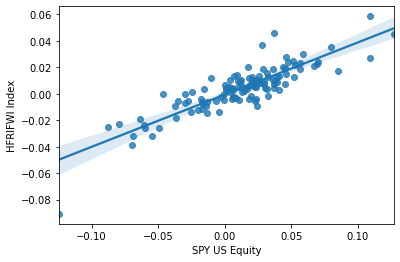

In [14]:
# Linear Regression

sns.regplot(x = mf['SPY US Equity'], y = hf['HFRIFWI Index'])
plt.show()

There are many ways to run regression in Python, it's highly recommended that you learn the use of statsmodel and scikit-learn. We initially imported both the modules in the current session and next we use them to construct regressions equations

We'll learn to apply single factor regression of the form:

$$
r_t = \alpha + \beta*r_{m,t} + \epsilon
$$

For multi-factor regression, we'll use the provided functions.

##### Regression with Scikit-Learn Demo

In [15]:
# Again, define what is the regressor (x or exogenous variable(s)) 
# and what is the regressand (y or endogenous variable) in the regression model
# In the default setting, Scikit-Learn includes an intercept. So no need to explicitly define an intercept

exog = pd.DataFrame(mf['SPY US Equity'])
endog = pd.DataFrame(hf['HFRIFWI Index'])

# Initalize the Model

model = LinearRegression()

# Fit the model, notice the difference in syntax from the statsmodels

fitted_model = model.fit(exog, endog)

In [16]:
# To get the coefficients:

alpha = fitted_model.intercept_
beta = fitted_model.coef_[0]

# For R-squared, call the .score method:

rsq = fitted_model.score(exog, endog)

# sklearn does not return the residuals, so we need to build them
yfit = model.predict(exog)
residuals = endog - yfit
var_resid = residuals.std()

In [17]:
# Helper Function below is based on scikit-learn and will allow you to construct the regression model and calculate key performance meterics. 
# If you are using the function below, I recommend that you go through the function to understand it's working


def get_ols_metrics(regressors, targets, annualization=1, ignorenan=True):
    # ensure regressors and targets are pandas dataframes, as expected
    if not isinstance(regressors, pd.DataFrame):
        regressors = regressors.to_frame()
    if not isinstance(targets, pd.DataFrame):
        targets = targets.to_frame()

    # align the targets and regressors on the same dates
    df_aligned = targets.join(regressors, how='inner', lsuffix='y ')
    Y = df_aligned[targets.columns]
    Xset = df_aligned[regressors.columns]

    reg = pd.DataFrame(index=targets.columns)
    for col in Y.columns:
        y = Y[col]
        
        if ignorenan:
            # ensure we use only non-NaN dates
            alldata = Xset.join(y,lsuffix='X')
            mask = alldata.notnull().all(axis=1)
            y = y[mask]
            X = Xset[mask]
        else:
            X = Xset

        model = LinearRegression().fit(X, y)
        reg.loc[col, 'alpha'] = model.intercept_ * annualization
        reg.loc[col, regressors.columns] = model.coef_
        reg.loc[col, 'r-squared'] = model.score(X, y)

        # sklearn does not return the residuals, so we need to build them
        yfit = model.predict(X)
        residuals = y - yfit

        # Treynor Ratio is only defined for univariate regression
        if Xset.shape[1] == 1:
            reg.loc[col,'Treynor Ratio'] = (y.mean() / model.coef_) * annualization

        
        # if intercept =0, numerical roundoff will nonetheless show nonzero Info Ratio
        num_roundoff = 1e-12
        if np.abs(model.intercept_) < num_roundoff:
            reg.loc[col, 'Info Ratio'] = None
        else:
            reg.loc[col, 'Info Ratio'] = (model.intercept_ / residuals.std()) * np.sqrt(annualization)

    return reg

In [18]:
get_ols_metrics(mf, hf, annualization=1, ignorenan=True)

,alpha,SPY US Equity,USGG3M Index,EEM US Equity,EFA US Equity,EUO US Equity,IWM US Equity,r-squared,Info Ratio
HFRIFWI Index,0.001,0.072,-0.401,0.072,0.106,0.022,0.131,0.856,0.170
MLEIFCTR Index,0.000,0.039,0.536,0.069,0.140,0.036,0.112,0.948,0.026
MLEIFCTX Index,-0.000,0.037,0.510,0.069,0.140,0.036,0.111,0.948,-0.000
HDG US Equity,-0.001,0.041,0.575,0.066,0.144,0.035,0.116,0.910,-0.186
QAI US Equity,-0.001,0.142,0.568,0.067,0.049,-0.003,0.024,0.788,-0.112


##### Regression with Statsmodel Demo

In [19]:
# We first need to define what is the regressor (x or exogenous variable(s)) 
# and what is the regressand (y or endogenous variable) in the regression model

exog = pd.DataFrame(mf['SPY US Equity'])
endog = pd.DataFrame(hf['HFRIFWI Index'])

# We will run this regression with an intercept. 
# In-case you don't want to include an intercept (exercise for extension) you can skip this step
# sm.add_constant adds a constant unit vector to the exogenous vector

exog = sm.add_constant(exog)
display(exog.head())

,const,SPY US Equity
date,,
2011-08-31,1.000,-0.055
2011-09-30,1.000,-0.069
2011-10-31,1.000,0.109
2011-11-30,1.000,-0.004
2011-12-31,1.000,0.010


In [20]:
# Let's 'train' the regression model to calculate regression coefficients (betas)

# Start by calling the appropriate linear regression function

model = sm.regression.linear_model.OLS(endog, exog)

# Fit the model to the data

fitted_model = model.fit()

# Display and analyze the summary of the model

print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:          HFRIFWI Index   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     366.0
Date:                Fri, 24 Jun 2022   Prob (F-statistic):           2.98e-38
Time:                        20:11:55   Log-Likelihood:                 404.50
No. Observations:                 122   AIC:                            -805.0
Df Residuals:                     120   BIC:                            -799.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0006      0.001     -0.733

In [21]:
# To access the coefficients of the regression, use the following command
# params[j] where j = 0 for intercept coefficient and {1,2...,N} for Nth Beta Coefficient

alpha = fitted_model.params[0]
beta1 = fitted_model.params[1]

#For the R-squared, use:

rsq = fitted_model.rsquared

#To calculate the residuals (errors) use the .resid command. Variance of residuals is used to calculate information ratio

residuals = fitted_model.resid
var_resid = residuals.std()

In [22]:
# Helper Function below is based on statsmodel and will allow you to construct the regression model and calculate key performance meterics. 
# If you are using the function bewlo, I recommend that you go through the function to understand it's working

def regressionAnalysis(exog,endog_df,intercept=False,prediction=False,displaySummary=[],displayRatios=False):
    
    if isinstance(exog,pd.Series):
        exog = pd.DataFrame(exog)
    if isinstance(endog_df,pd.Series):
        endog_df = pd.DataFrame(endog_df)
    if displaySummary==True:
        displaySummary = endog_df.columns

    if intercept:
        exog = sm.tools.add_constant(exog)

    ratios = []
    
    # loop through each column in data (y-variable DataFrame)
    
    for col,endog in pd.DataFrame(endog_df).iteritems():
        model = sm.regression.linear_model.OLS(endog,exog).fit()
        
        fitted_val = model.predict(exog).mean()
        betas = []
        treynor_ratios = []

        if intercept:
            exogCols = exog.columns[1:]
        else:
            exogCols = exog.columns
        for x in exogCols:
            betas.append('{:.3f}'.format(model.params[x]))
            treynor_ratios.append('{:.3f}'.format((endog.mean()/model.params[x])*12))
        if len(betas)==1:
            betas = betas[0]
            treynor_ratios = treynor_ratios[0]
        if intercept:
            alpha = model.params['const']
            info_ratio = (alpha/model.resid.std())*np.sqrt(12)
        else:
            alpha = None
            info_ratio = None
        r_squared = model.rsquared
        tracking_err = model.resid.std()
        ratios.append([fitted_val,alpha,info_ratio,betas,treynor_ratios,r_squared,tracking_err])

        if col in displaySummary:
            print(model.summary())
    
    regRatios = pd.DataFrame(list(zip(*ratios)),
                             columns=endog_df.columns,
                             index=['avg_fitted_val',
                                    'alpha','information_ratio',
                                    'beta','treynor_ratio',
                                    'r_squared','tracking_error'])
    
    if prediction:
        return model.predict(exog)

    if displayRatios:
        return regRatios

    
regressionAnalysis(mf['SPY US Equity'],hf,intercept=True,displayRatios=True)

,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
avg_fitted_val,0.004,0.003,0.003,0.002,0.002
alpha,-0.001,-0.001,-0.001,-0.002,-0.001
information_ratio,-0.242,-0.615,-0.671,-1.011,-0.687
beta,0.394,0.359,0.358,0.369,0.285
treynor_ratio,0.129,0.108,0.104,0.076,0.089
r_squared,0.753,0.816,0.815,0.786,0.719
tracking_error,0.009,0.007,0.007,0.008,0.007


To learn more about scikit-learn and statsmodel, I recommend the following resources:

    1. https://scikit-learn.org/stable/
    2. https://www.statsmodels.org/stable/index.html